<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/02_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📘 Multiple Linear Regression

**Goal:** Predict output `y` from multiple input features `x1, x2, ..., xn`.


y = m₁x₁ + m₂x₂ + ... + mₙxₙ + c  



In [2]:
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# few columns like sex,smoker,region are not numeric hence we will convert it
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
#check for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
#charges is dependent variable
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [9]:
y=df['charges']
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [12]:
#now we have input and label variables, we will split the data into train test data for supervised learning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape) #70% training data, 30% test data

(936, 6) (402, 6) (936,) (402,)


In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
#fit training data to linear regression model, it uses the Normal Equation, which directly computes the optimal weights and bias
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
c=lr.intercept_
c #bias

np.float64(-12364.391322279254)

In [20]:
m=lr.coef_
m #weights for the 6 input variables

array([  261.62568984,   109.64719595,   344.54483066,   424.37016596,
       23620.80252148,  -326.46262527])

In [21]:
# now our linear model is trained on x and y data, time to test it
y_train_pred=lr.predict(x_train)

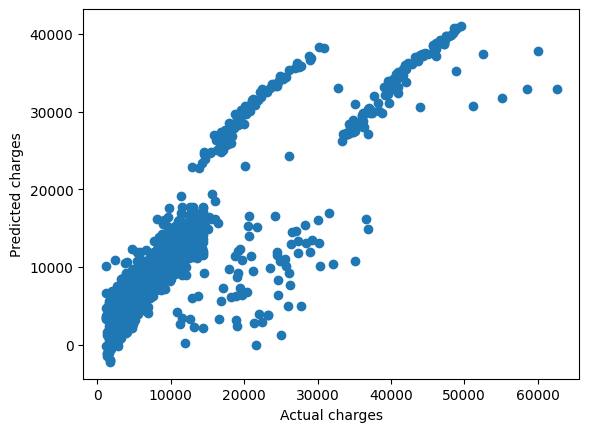

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()

In [26]:
from sklearn.metrics import r2_score #R² score tells you how well your model explains the variation in the target variable y
r2_score(y_train,y_train_pred)

0.7422571320172101

In [27]:
# test our model on testing data
y_test_pred=lr.predict(x_test)

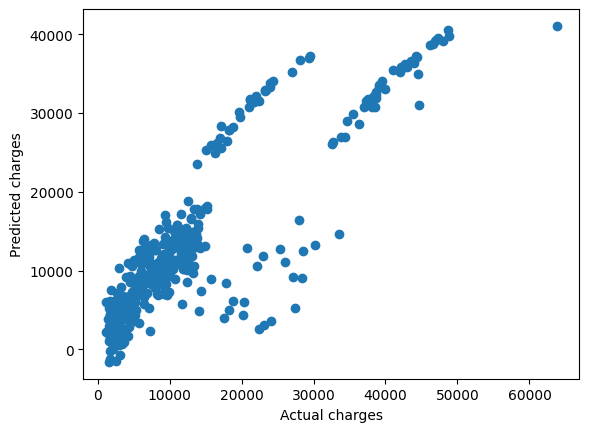

In [28]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()

In [29]:
r2_score(y_test,y_test_pred)

0.7694415927057693